## **Rupa Navale**
## **GRIP @The Sparks Foundation Internship - Sept 2023**
## **Data Science & Business Analytics Intern**

## **Task: Prediction Using Supervised ML**
###**Objective:**
Develop a predictive model using simple linear regression to estimate a student's percentage score based on the number of hours they have studied. This model will aid in understanding the relationship between study hours and academic performance.

## **Index:**
####**Step 1**: Import the necessary libraries    
####**Step 2**: Load & explore the dataset
####**Step 3**: Prepare the data
####**Step 4**: Train the algorithm
####**Step 5**: Making Predictions
####**Step 6**: Evaluating the model
####**Step 7**: Summary

##**Step 1: Import the necessary libraries:**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from google.colab import drive

##**Step 2: Load & explore the dataset:**

In [35]:
# Load the dataset:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Data/Student Score.txt")
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [36]:
## Discovering number of rows & columns:
df.shape

(25, 2)

In [37]:
#checking whether any null values are present:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [38]:
#info() is used to give basic information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [39]:
#Describe() is used to get the statistical summary of the data.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


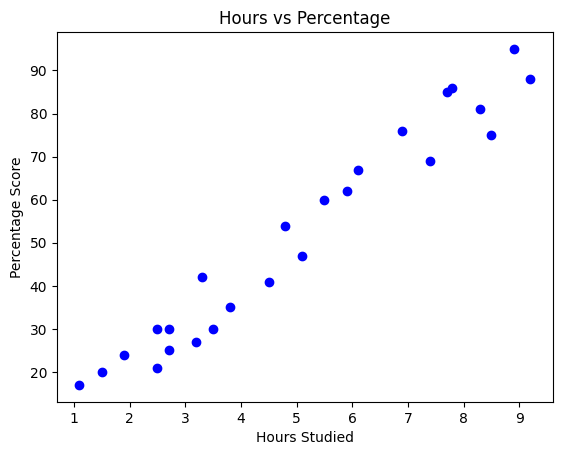

In [6]:
# Visualizing the data
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [29]:
#Finding correlation between Hours & Scores:
df.corr()

,Actual,Predicted
Actual,1.000000,0.980684
Predicted,0.980684,1.000000


##**Step 3: Prepare the data:**

In [20]:
#Divide the data into "attributes" (inputs) and "labels" (outputs):
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [21]:
#Split this data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##**Step 4: Train the algorithm:**

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


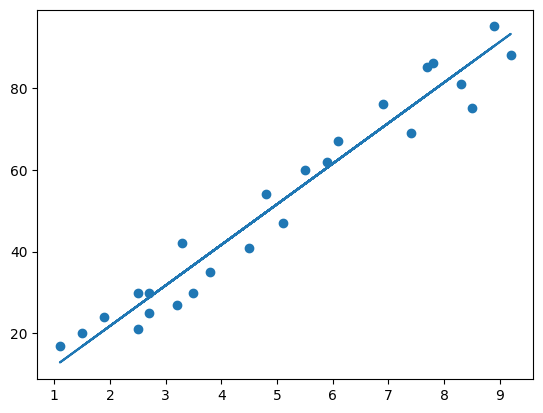

In [23]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

##**Step 5: Making predictions:**

In [24]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
#What will be predicted score if a student studies for 9.25 hrs/day?
hours = np.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours Studied = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours Studied = 9.25
Predicted Score = 93.69173248737539


##**Step 6: Evaluating the model:**

In [28]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
MAE = round(mean_absolute_error(y_test,y_pred),2)
MSE = round(mean_squared_error(y_test,y_pred),2)
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print(f'Mean Absoluter Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error : {RMSE}')

Mean Absoluter Error : 4.18
Mean Squared Error : 21.6
Root Mean Squared Error : 4.65


In [33]:
print(f'R-Squared Score : {round(r2_score(y_test,y_pred),3)}')

R-Squared Score : 0.945


##**Step 6: Summary:**

- **EDA:**

1.  The dataset consist of students study hours and their percentage score.

2.  There are 25 rows and 2 columns.

3. Student's Percentage score range from 17 - 95, where 17 is the minimum score,95 being the maximum score and median score is 47.

4. Student's study hours range from 1.1 hrs - 9.2 hrs where 1.1hrs is the minimum, 9.2 is the maximum and median number of hours students studied is 4.8.

5. Correlation between Hours vs Scores is 0.9806. Hence their is a positive linear relationship between Hours studied and Students percentage score.


- **Problem Statement :**
 **Predict score of a student when student studies for 9.25 hrs/day**

- Using simple linear regression to predict student's percentage score. Linear regression model has predicted the percentage score as 93.69 when student studies for 9.25 hrs/day.

- The Simple Linear Regression model performs well as the R-Squared value is 0.945.